Confusion Matrix:
[[50  2]
 [ 7 21]]

Performance Metrics:
True Positives (TP): 21
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 7
Accuracy: 88.75%
Error Rate: 11.25%
Precision: 91.30%
Recall: 75.00%


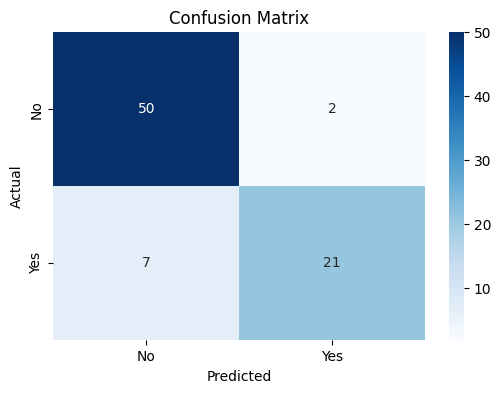

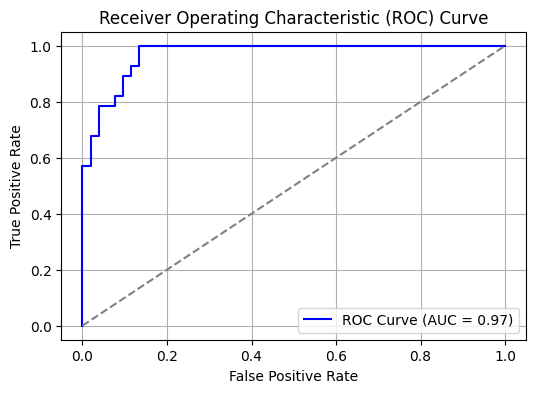

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Set file path directly (update this path as needed)
file_path =  r"C:\Users\HP\Desktop\jUPYTER\archive (3)\Social_Network_Ads.csv" 

# Load the dataset
df = pd.read_csv(file_path)

# Drop User ID column (not needed for classification)
df = df.drop(columns=["User ID"], errors='ignore')

# Encode Gender column (Male -> 1, Female -> 0)
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Define features and target variable
X = df.drop(columns=["Purchased"])
y = df["Purchased"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nPerformance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Visualization - Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




# Visualization - ROC Curve
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (Purchased = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


